In [0]:
import tensorflow as tf
print (tf.__version__)

1.13.1


In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.9999):
            print("\n¡Alcanzó el 99.99% de precisión, de modo que se cancela el entrenamiento!")
            self.model.stop_training = True

In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(training_images, trainig_labels),(test_images, test_labels)=mnist.load_data()

In [0]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images/ 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [0]:
callbacks = myCallback()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 150)               3244950   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1510      
Total params: 3,247,740
Trainable params: 3,247,740
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(training_images, trainig_labels, epochs=15, callbacks=[callbacks])

Epoch 1/15
60000/60000 [==============================] - 174s 3ms/sample - loss: 0.1203 - acc: 0.9638
Epoch 2/15
60000/60000 [==============================] - 172s 3ms/sample - loss: 0.0420 - acc: 0.9868
Epoch 3/15
60000/60000 [==============================] - 170s 3ms/sample - loss: 0.0250 - acc: 0.9919
Epoch 4/15
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0150 - acc: 0.9950
Epoch 5/15
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0114 - acc: 0.9961
Epoch 6/15
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.0086 - acc: 0.9970
Epoch 7/15
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0062 - acc: 0.9981
Epoch 8/15
60000/60000 [==============================] - 167s 3ms/sample - loss: 0.0054 - acc: 0.9983
Epoch 9/15
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0057 - acc: 0.9984
Epoch 10/15
60000/60000 [==============================] - 167s 3ms/sampl

In [0]:
test_loss =model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 5s 488us/sample - loss: 0.0736 - acc: 0.9862


IndexError: ignored

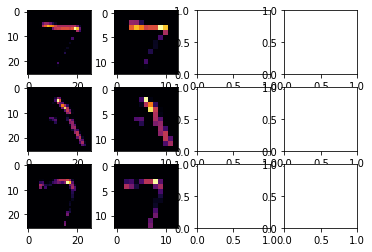

In [0]:
import matplotlib.pyplot as plt
f , axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model( inputs = model.input, outputs = layer_outputs )
for x in range (0,4):
    f1 = activation_model.predict( test_images[FIRST_IMAGE].reshape(1,28,28,1) )[x]
    axarr[0,x].imshow( f1[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[0,x].grid(False)
    f2 = activation_model.predict( test_images[SECOND_IMAGE].reshape(1,28,28,1) )[x]
    axarr[1,x].imshow( f2[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[1,x].grid(False)
    f3 = activation_model.predict( test_images[THIRD_IMAGE].reshape(1,28,28,1) )[x]
    axarr[2,x].imshow( f3[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[2,x].grid(False)
